# Basic Model

## Prepare training data

In [1]:
import pandas as pd
import sys,os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [4]:
image_path = "D:/Projects/CK_plus/datasets/images"
label_path = "D:/Projects/CK_plus/datasets/Emotion"
image_target_path = "D:/Projects/CK_plus/datasets/target_images"

# image_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/cohn-kanade-images"
# label_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/Emotion"
# image_target_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/images"

In [5]:
img_data = pd.read_csv("CSV/img_data.csv")
img_data = img_data[['img_id','em_id','emotion','img_num']]
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000007,S005_001_00000011,3,11
1,S005_001_00000008,S005_001_00000011,3,11
2,S005_001_00000009,S005_001_00000011,3,11
3,S005_001_00000010,S005_001_00000011,3,11
4,S005_001_00000011,S005_001_00000011,3,11


In [6]:
# Anger,Contempt, Disgust, Fear, Happy, Sadness and Surprise.
emotions_dict = {1:"An",2:"Con",3:"Di",4:"Fe",5:"Ha",6:"Sa",7:"Sur"}
emotions_dict

{1: 'An', 2: 'Con', 3: 'Di', 4: 'Fe', 5: 'Ha', 6: 'Sa', 7: 'Sur'}

In [7]:
img_data['emotion']=img_data.emotion.apply(lambda em:emotions_dict[em])
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000007,S005_001_00000011,Di,11
1,S005_001_00000008,S005_001_00000011,Di,11
2,S005_001_00000009,S005_001_00000011,Di,11
3,S005_001_00000010,S005_001_00000011,Di,11
4,S005_001_00000011,S005_001_00000011,Di,11


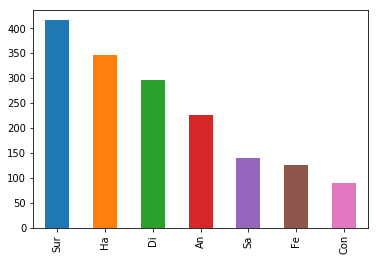

In [8]:
img_data.emotion.value_counts().plot(kind="bar")

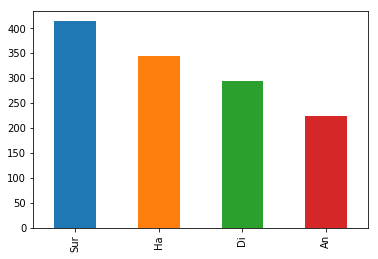

In [9]:
img_data = img_data[~img_data.emotion.isin(['Sa','Fe','Con'])]
img_data.emotion.value_counts().plot(kind="bar")

In [10]:

img_data['name']=img_data.img_id.apply(lambda id: id+".png")
img_data.head()

,img_id,em_id,emotion,img_num,name
0,S005_001_00000007,S005_001_00000011,Di,11,S005_001_00000007.png
1,S005_001_00000008,S005_001_00000011,Di,11,S005_001_00000008.png
2,S005_001_00000009,S005_001_00000011,Di,11,S005_001_00000009.png
3,S005_001_00000010,S005_001_00000011,Di,11,S005_001_00000010.png
4,S005_001_00000011,S005_001_00000011,Di,11,S005_001_00000011.png


In [11]:
train_index = np.random.rand(len(img_data)) < 0.8
train_set = img_data[train_index].copy()
val_set = img_data[~train_index].copy()

In [12]:
print("train_set_num=",len(train_set))
print("test_set_num=",len(val_set))
print("total_set_num=",len(img_data))

train_set_num= 1027
test_set_num= 253
total_set_num= 1280


In [13]:
train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()

In [14]:
val_set.head()

,img_id,em_id,emotion,img_num,name
8,S010_002_00000013,S010_002_00000014,Sur,14,S010_002_00000013.png
36,S011_004_00000018,S011_004_00000021,An,21,S011_004_00000018.png
40,S011_005_00000016,S011_005_00000020,Di,20,S011_005_00000016.png
45,S011_006_00000009,S011_006_00000013,Ha,13,S011_006_00000009.png
52,S014_001_00000027,S014_001_00000029,Sur,29,S014_001_00000027.png


In [15]:
batch_size=16
width = 480
hight = 480
train_generator =  train_gen.flow_from_dataframe(train_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              class_mode="categorical",  
                              batch_size=batch_size, shuffle=True,
                                                 # data augmentation
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'
                                                )


Found 1011 images belonging to 4 classes.


In [16]:
imge, label = train_generator.next()
print(label)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [17]:
validation_generator = val_gen.flow_from_dataframe(val_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              batch_size=batch_size, shuffle=True,
                              class_mode="categorical",
                              save_format='png')

Found 243 images belonging to 4 classes.


In [24]:
import keras
from keras import applications

resnet50 = applications.resnet50.ResNet50(include_top=False,input_shape=(width,hight,3))


In [25]:
resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 480, 480, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 486, 486, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 240, 240, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 240, 240, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [26]:
layer_num = len(resnet50.layers)
for i in range(layer_num):
    if i < layer_num-12:
        resnet50.layers[i].trainable = False

for layer in resnet50.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
Tr

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(resnet50)
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 15, 15, 2048)      23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 15, 15, 32)        65568     
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28804     
Total params: 23,682,084
Trainable params: 4,560,036
Non-trainable params: 19,122,048
_________________________________________________________________


In [29]:
model.fit_generator(
        generator=train_generator,
        steps_per_epoch=128//batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=64//batch_size
)


Epoch 1/20
8/8 [==============================] - 139s 17s/step - loss: 4.3733 - categorical_accuracy: 0.3438 - val_loss: 3.9008 - val_categorical_accuracy: 0.3594
Epoch 2/20
8/8 [==============================] - 137s 17s/step - loss: 0.9089 - categorical_accuracy: 0.7109 - val_loss: 2.1617 - val_categorical_accuracy: 0.6094
Epoch 3/20
8/8 [==============================] - 131s 16s/step - loss: 0.3411 - categorical_accuracy: 0.8750 - val_loss: 3.4083 - val_categorical_accuracy: 0.4062
Epoch 4/20
8/8 [==============================] - 122s 15s/step - loss: 0.3658 - categorical_accuracy: 0.8281 - val_loss: 0.6640 - val_categorical_accuracy: 0.8431
Epoch 5/20
8/8 [==============================] - 131s 16s/step - loss: 0.2417 - categorical_accuracy: 0.9141 - val_loss: 1.9938 - val_categorical_accuracy: 0.4062
Epoch 6/20
8/8 [==============================] - 131s 16s/step - loss: 0.1136 - categorical_accuracy: 0.9766 - val_loss: 4.1832 - val_categorical_accuracy: 0.5312
Epoch 7/20
8/8 [

In [30]:
history = model.history

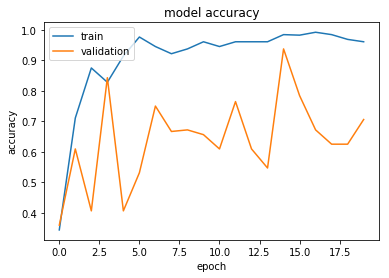

In [31]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

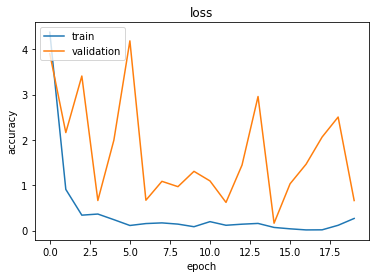

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
print(model.predict_classes)

<bound method Sequential.predict_classes of <keras.engine.sequential.Sequential object at 0x0000024E2D302D68>>


In [35]:
test_index = np.random.rand(len(val_set)) < 0.5
test_set = val_set[test_index].copy()
test_generator =  train_gen.flow_from_dataframe(test_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              class_mode="categorical",  
                              batch_size=batch_size, shuffle=True)

Found 127 images belonging to 4 classes.


In [ ]:
test_label = []
for i in range(1):
    image, label = next(test_generator)
    print(label)
    

In [36]:
prediction = model.predict_generator(test_generator,steps=len(test_set)/batch_size,verbose=0)

In [37]:
test_generator.class_indices

{'An': 0, 'Di': 1, 'Ha': 2, 'Sur': 3}

In [38]:
# y_true = np.array(test_generator.classes) + 1
# y_true_label = []
# for i in y_true:
#     y_true_label.append(emotions_dict[i])
# y_pred = np.argmax(prediction,axis=1)
# y_pred = y_pred+1
# y_pred_label = []
# for i in y_pred:
#     y_pred_label.append(emotions_dict[i])


In [39]:
y_pred = np.argmax(prediction,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [127, 143]